# Using Multiple "Passes" of the Data. 

To demonstrate API usage for this use case, I've taken a dataset of astronomy observations of galaxies. Each object has been imaged 5 times. While technically these 5 images represent one "pass" of the object with 5 different CCD filters, this dataset can demonstrate ways of working with multiple images in DataRobot. 


This notebook goes over the most direct approach which is simply to have the images broken out across different columns up to a certain number of passes. This is the most direct way have DataRobot use multiple images. Even though there may be a differing number of images for each object, you can include any number of images this was: `pass1`, `pass2`, `pass3` etc.  

Using a secondary dataset (as showin in Notebook 2), DataRobot will only take the latest image from the series. 

## About the Data

As mentioned, the data represents images from the [SDSS Sky Survey](https://portal.nersc.gov/project/dasrepo/self-supervised-learning-sdss/dataset.html). For each object identified by ObjID, they have captured the RA and DEC of its position and 5 images across the telecope's 5 filters (Ultraviolet, green, red, Near Infrared, Infrared). 

For this DataRobot demonstration, I've created an image by plotting each 107x107 pixel across a color space chosen for each filter. 

```python
def create_custom_colormaps():
    """Create different colormaps for each band"""
    # u-band: Purple-themed
    purple_cmap = LinearSegmentedColormap.from_list('u_band', ['black', 'mediumpurple', 'white'])
    
    # g-band: Green-themed
    green_cmap = LinearSegmentedColormap.from_list('g_band', ['black', 'forestgreen', 'white'])
    
    # r-band: Red-themed
    red_cmap = LinearSegmentedColormap.from_list('r_band', ['black', 'firebrick', 'white'])
    
    # i-band: Orange-themed
    orange_cmap = LinearSegmentedColormap.from_list('i_band', ['black', 'darkorange', 'white'])
    
    # z-band: Magenta-themed
    magenta_cmap = LinearSegmentedColormap.from_list('z_band', ['black', 'magenta', 'white'])

```

I then sampled that dataset. The target is the 'specz_redshift` which helps determines the galaxy's distance. These models generally do not perform well. This dataset was actually set-up to estimate redshift using a different target that was not available in the data extracts but as a demonstration this dataset works. 


Image size: (107, 107)
Image mode: RGBA


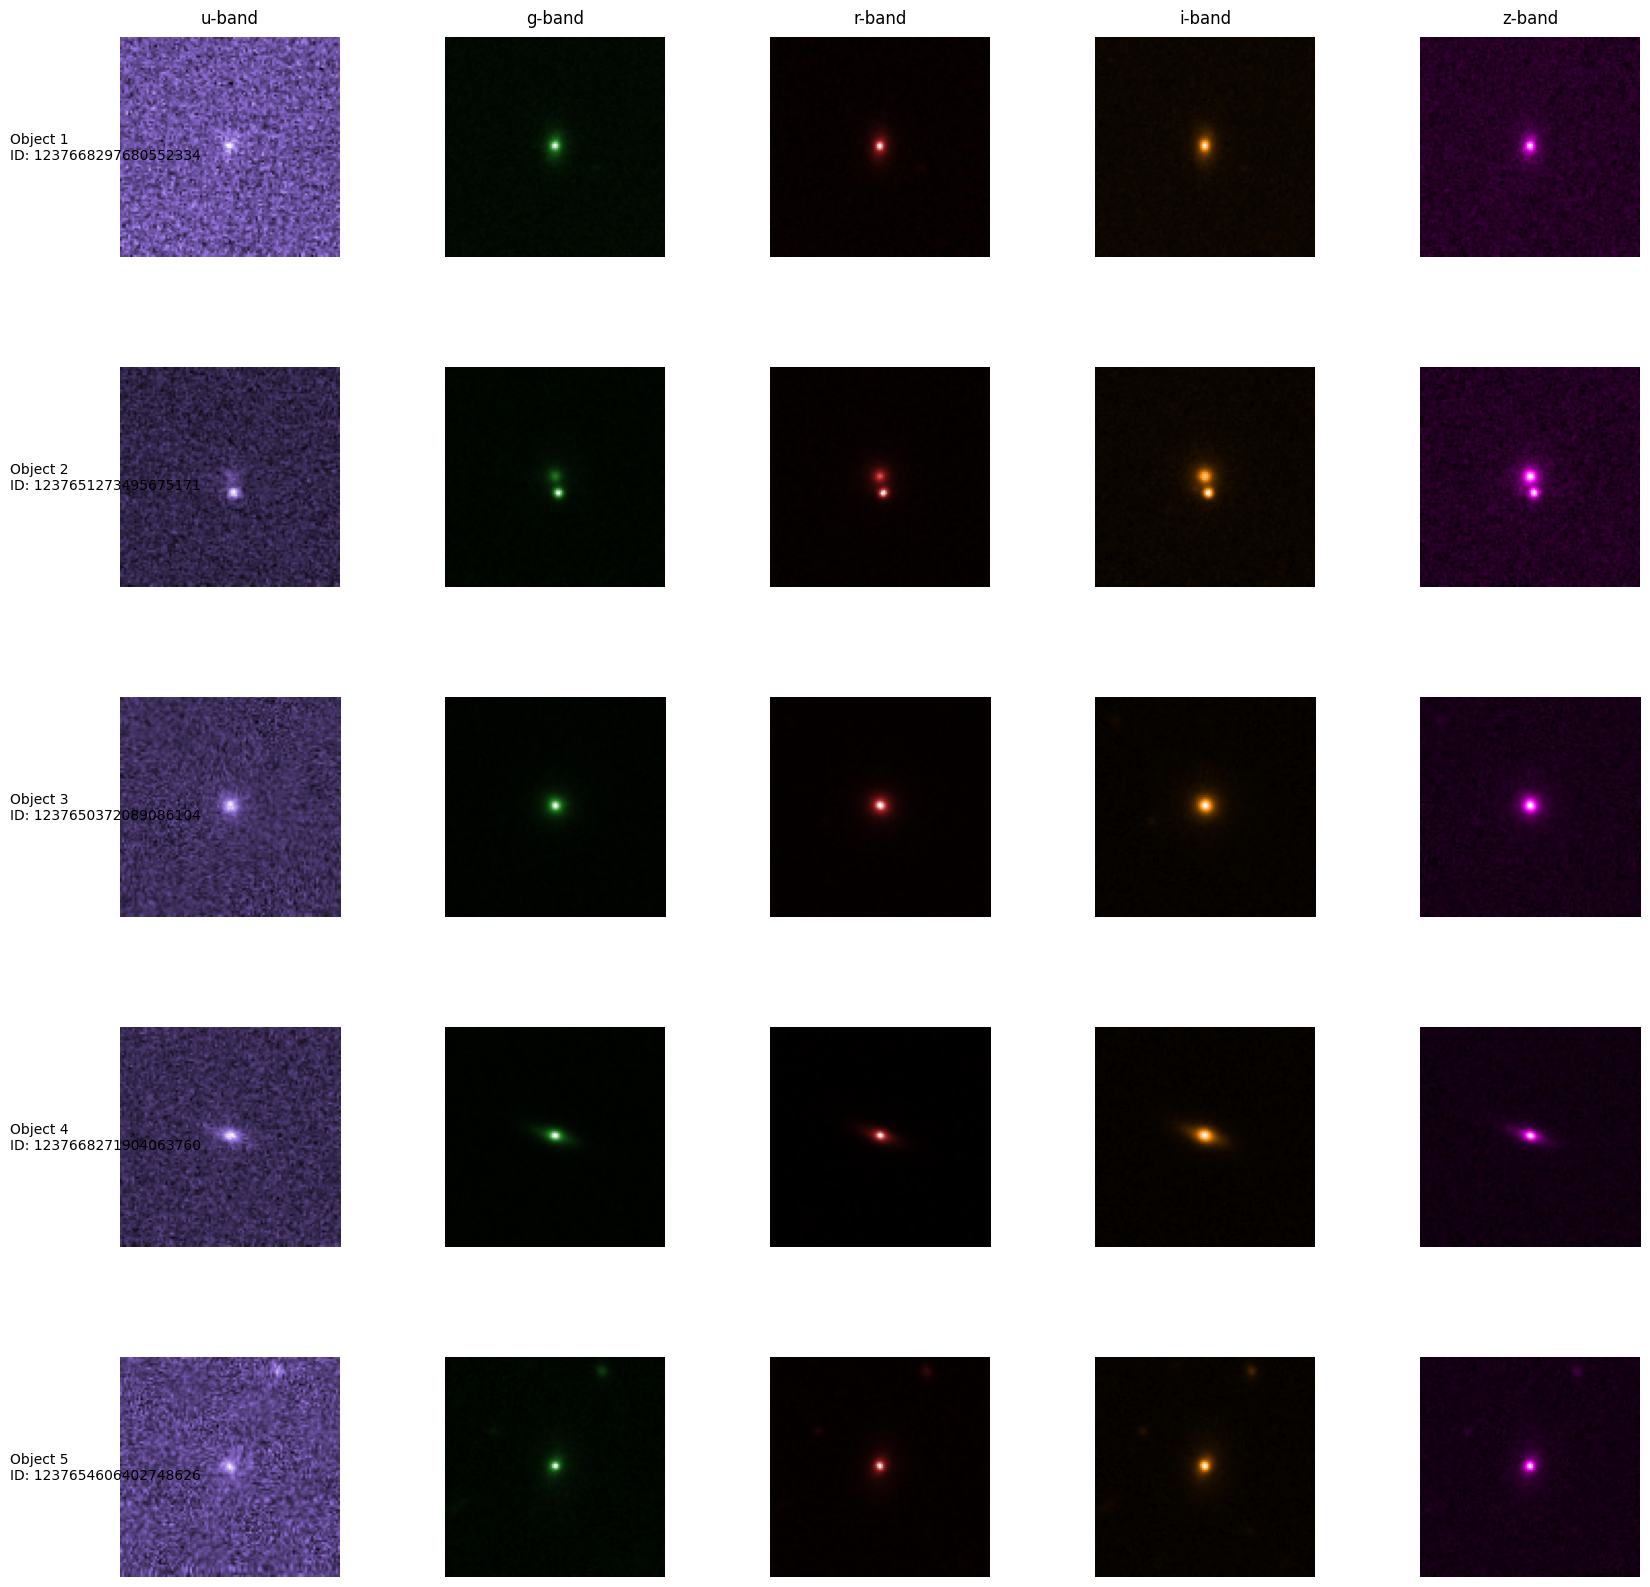


Object 1:
ObjID: 1237668297680552334
RA: 217.0310
Dec: 16.9033
Redshift: 0.0508

Object 2:
ObjID: 1237651273495675171
RA: 122.6448
Dec: 49.2357
Redshift: 0.1229

Object 3:
ObjID: 1237650372089086104
RA: 172.1163
Dec: -1.3251
Redshift: 0.0401

Object 4:
ObjID: 1237668271904063760
RA: 215.8425
Dec: 17.2906
Redshift: 0.0521

Object 5:
ObjID: 1237654606402748626
RA: 167.5618
Dec: 5.4255
Redshift: 0.0930


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import base64
from PIL import Image
import io
import numpy as np

# Read the CSV
df = pd.read_csv('https://storage.googleapis.com/public-artifacts-datarobot/astro_images/training_sample%201000%20row%20sample.csv')


# Create a figure with subplots
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# For each of the first 5 rows
for row_idx in range(5):
    # Add a title for each row
    axes[row_idx, 0].text(-0.5, 0.5, f'Object {row_idx+1}\nID: {df.iloc[row_idx]["ObjID"]}', 
                         transform=axes[row_idx, 0].transAxes, 
                         verticalalignment='center')
    
    # For each filter (u,g,r,i,z)
    for filter_idx in range(5):
        # Get the base64 string
        img_str = df.iloc[row_idx][f'image{filter_idx+1}']
        
        try:
            # Decode base64 string
            img_data = base64.b64decode(img_str)
            
            # Convert to image
            img = Image.open(io.BytesIO(img_data))
            
            # Print image size for verification
            if row_idx == 0 and filter_idx == 0:
                print(f"Image size: {img.size}")
                print(f"Image mode: {img.mode}")
            
            # Convert to numpy array for display
            img_array = np.array(img)
            
            # Plot
            axes[row_idx, filter_idx].imshow(img_array)
            axes[row_idx, filter_idx].axis('off')
            
            # Add filter name as title (only for first row)
            if row_idx == 0:
                axes[0, filter_idx].set_title(f'{["u","g","r","i","z"][filter_idx]}-band',
                                            fontsize=12, pad=10)
                
        except Exception as e:
            print(f"Error displaying image at row {row_idx}, filter {filter_idx}: {e}")
            axes[row_idx, filter_idx].text(0.5, 0.5, 'Error loading image',
                                         ha='center', va='center')
            axes[row_idx, filter_idx].axis('off')

plt.show()

# Print some metadata for verification
for idx in range(5):
    print(f"\nObject {idx+1}:")
    print(f"ObjID: {df.iloc[idx]['ObjID']}")
    print(f"RA: {df.iloc[idx]['ra']:.4f}")
    print(f"Dec: {df.iloc[idx]['dec']:.4f}")
    print(f"Redshift: {df.iloc[idx]['specz_redshift']:.4f}")

In [2]:
df.head()

,ObjID,dec,e_bv,ra,specObjID,specz_redshift,specz_redshift_err,image1,image2,image3,image4,image5
0,1237668297680552334,16.903253,0.028822,217.030989,3108681736872028160,0.050827,0.000018,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...
1,1237651273495675171,49.235665,0.044559,122.644830,495499070303922176,0.122863,0.000031,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...
2,1237650372089086104,-1.325108,0.024560,172.116275,367187445499848704,0.040100,0.000014,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...
3,1237668271904063760,17.290598,0.020130,215.842549,3107600366716348416,0.052087,0.000010,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...
4,1237654606402748626,5.425507,0.053831,167.561821,654308139222460416,0.093019,0.000017,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...,iVBORw0KGgoAAAANSUhEUgAAAGsAAABrCAYAAABwv3wMAA...


Kicking off a project for this dataset is fairly straightforward. This takes awhile as we will use the full dataset (4.3gb). 



In [6]:
import datarobot as dr 
c = dr.Client(config_path="/Users/luke.shulman/.config/datarobot/drconfig.yml")

full_dataset = dr.Dataset.create_from_url("https://storage.googleapis.com/public-artifacts-datarobot/astro_images/training_sample_50k.csv")
full_dataset.modify(name="MultiImage Training 50k")
full_dataset.update()




In [20]:
project = dr.Project.create_from_dataset(full_dataset.id, project_name="MultiImage Project 50k")

featurelist = project.create_featurelist("remove redshift derivations_", features=[
    "ra", "dec", "e_bv", "image1", "image2", "image3", "image4", "image5"
])

project.set_target(target="specz_redshift", featurelist_id=featurelist.id, max_wait=3600)

Project(MultiImage Project 50k)